# I. Import thư viện

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import islice
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
import pickle
from joblib import dump, load

In [144]:
#from google.colab import drive
#drive.mount('/content/drive')

# II. Đọc dữ liệu

In [145]:
#df = pd.read_csv('/content/drive/MyDrive/DS317/df.csv')
df = pd.read_csv('D:\Learning\Semester 1 year 4\DS317\Project\Data\Preprocessed_Data_IncludeCTN_For_Models.csv')

# III. Xây dựng mô hình




In [146]:
X = df.drop(columns={'xeploai'})
y = df['xeploai']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
labels = ['Rớt', 'Trung bình', 'Trung bình khá', 'Khá', 'Giỏi', 'Xuất sắc']

In [149]:
def visualization(y_test, y_pred):
  print('Weighted f1_score: ',f1_score(y_test, y_pred, average='weighted'))
  print('Macro f1_score: ',f1_score(y_test, y_pred, average='macro'))
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

In [150]:
def make_results_df(orginal, res_list):
    df_res = pd.DataFrame({
        'Accuracy': [accuracy_score(orginal, u) for u in res_list],
        'Precision': [precision_score(orginal, u, average='macro') for u in res_list],
        'Recall': [recall_score(orginal, u, average='macro') for u in res_list],
        'F1-macro': [f1_score(orginal, u, average='macro') for u in res_list]
    }, index=['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'])
    return df_res

In [151]:
# Dữ liệu 3 năm học
X_train = X_train.drop(columns=['diem_3_5', 'drl_3_5', 'rotmon_3_5', 'tc_tichluy_3_5'])
X_test = X_test.drop(columns=['diem_3_5', 'drl_3_5', 'rotmon_3_5', 'tc_tichluy_3_5'])

In [152]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 5223 to 7270
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   namsinh        6260 non-null   float64
 1   gioitinh       6260 non-null   float64
 2   noisinh        6260 non-null   int64  
 3   khoa           6260 non-null   int64  
 4   hedt           6260 non-null   int64  
 5   khoahoc        6260 non-null   float64
 6   chuyennganh2   6260 non-null   int64  
 7   tinhtrang      6260 non-null   float64
 8   diachi_tinhtp  6260 non-null   int64  
 9   diemnamhoc1    6260 non-null   float64
 10  diemnamhoc2    6260 non-null   float64
 11  diemnamhoc3    6260 non-null   float64
 12  drlnam1        6260 non-null   float64
 13  drlnam2        6260 non-null   float64
 14  drlnam3        6260 non-null   float64
 15  dien_tt        6260 non-null   int64  
 16  diem_tt        6260 non-null   float64
 17  sotc_rot1      6260 non-null   float64
 18  sotc_

## 1. Xét 3 năm học

### a) Decision Tree

In [153]:
model_dt = DecisionTreeClassifier(random_state=42)

In [154]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

Weighted f1_score:  0.9208218477238114
Macro f1_score:  0.7318198460948399
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1165
           1       0.88      0.83      0.86        18
           2       0.58      0.56      0.57        50
           3       0.81      0.84      0.83       227
           4       0.73      0.71      0.72       102
           5       0.40      0.50      0.44         4

    accuracy                           0.92      1566
   macro avg       0.73      0.74      0.73      1566
weighted avg       0.92      0.92      0.92      1566



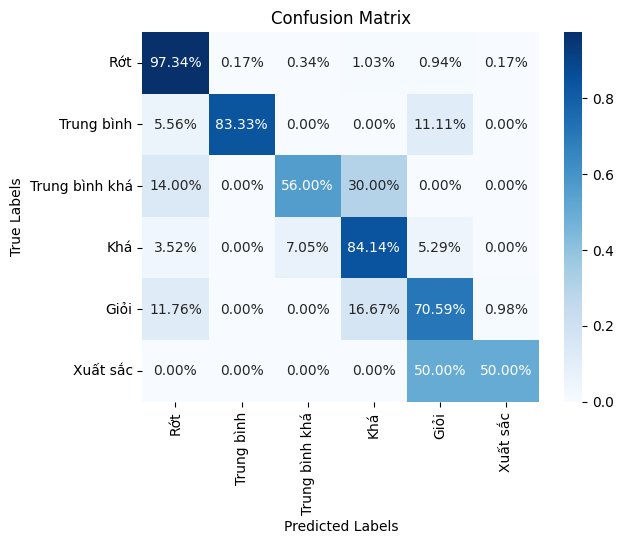

In [155]:
visualization(y_test, y_pred_dt)

### b) Random Forest

In [156]:
model_rf = RandomForestClassifier(random_state=42)

In [157]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9333961632260824
Macro f1_score:  0.6830184599866232
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.84      0.89      0.86        18
           2       0.70      0.56      0.62        50
           3       0.81      0.89      0.85       227
           4       0.75      0.81      0.78       102
           5       0.00      0.00      0.00         4

    accuracy                           0.93      1566
   macro avg       0.68      0.69      0.68      1566
weighted avg       0.93      0.93      0.93      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

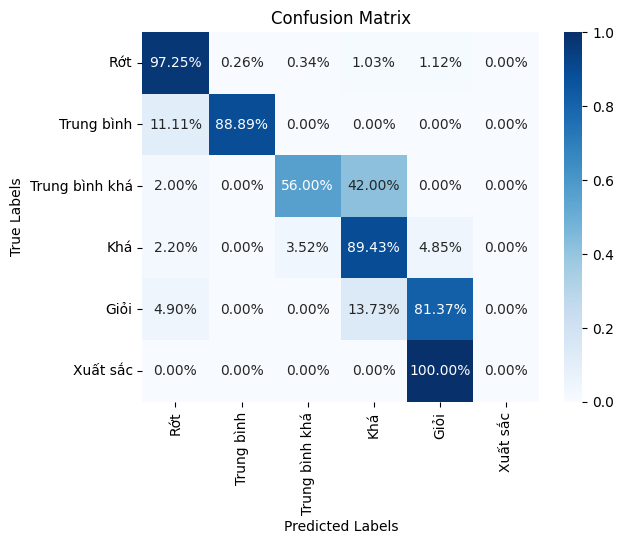

In [158]:
visualization(y_test, y_pred_rf)

### c) XGBoost

In [159]:
model_xg = XGBClassifier(random_state=42)

In [160]:
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9385707638982392
Macro f1_score:  0.750596808328345
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.88      0.78      0.82        18
           2       0.78      0.62      0.69        50
           3       0.84      0.89      0.86       227
           4       0.76      0.88      0.82       102
           5       0.50      0.25      0.33         4

    accuracy                           0.94      1566
   macro avg       0.79      0.73      0.75      1566
weighted avg       0.94      0.94      0.94      1566



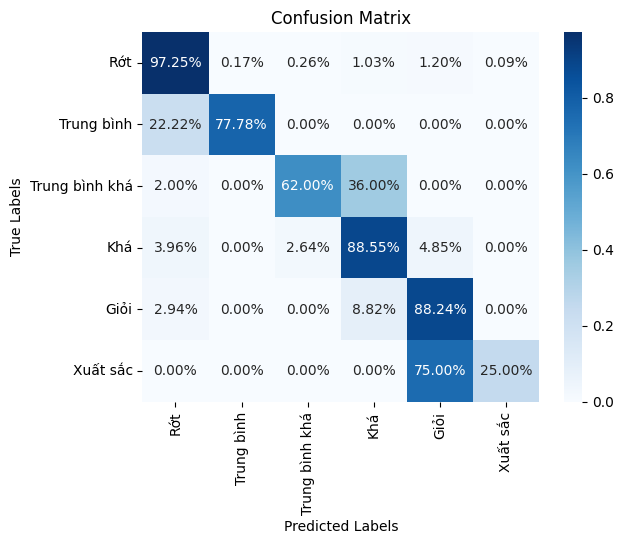

In [161]:
visualization(y_test, y_pred_xg)

### d) LightGBM

In [162]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [163]:
model_lgb.fit(X_train, y_train)
y_pred_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 26
[LightGBM] [Info] Start training from score -0.276878
[LightGBM] [Info] Start training from score -4.209336
[LightGBM] [Info] Start training from score -3.673031
[LightGBM] [Info] Start training from score -1.945112
[LightGBM] [Info] Start training from score -2.861402
[LightGBM] [Info] Start training from score -6.544711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

Weighted f1_score:  0.934977808526068
Macro f1_score:  0.702750615559729
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.94      0.92        18
           2       0.72      0.62      0.67        50
           3       0.82      0.90      0.86       227
           4       0.77      0.83      0.80       102
           5       0.00      0.00      0.00         4

    accuracy                           0.93      1566
   macro avg       0.70      0.71      0.70      1566
weighted avg       0.94      0.93      0.93      1566



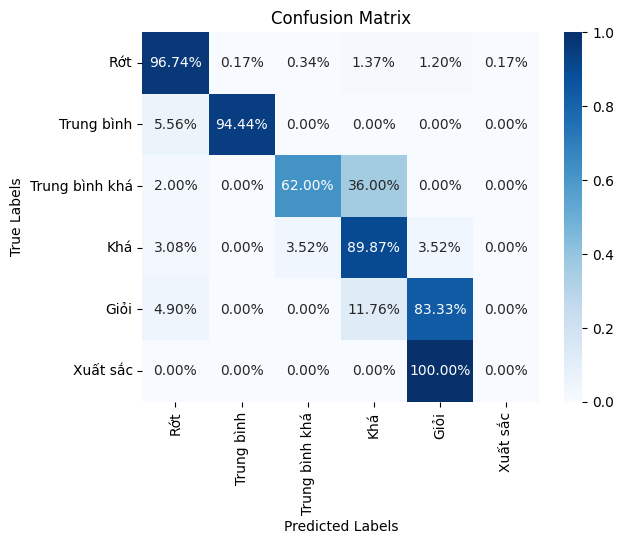

In [164]:
visualization(y_test, y_pred_lg)

### e) CatBoost

In [165]:
model_cb = CatBoostClassifier(random_state=42)

In [166]:
model_cb.fit(X_train, y_train)
y_pred_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.4647351	total: 51.4ms	remaining: 51.3s
1:	learn: 1.2560847	total: 80.4ms	remaining: 40.1s
2:	learn: 1.1039533	total: 99.4ms	remaining: 33s
3:	learn: 0.9872469	total: 116ms	remaining: 28.9s
4:	learn: 0.8894860	total: 132ms	remaining: 26.4s
5:	learn: 0.8074882	total: 151ms	remaining: 25s
6:	learn: 0.7385688	total: 166ms	remaining: 23.6s
7:	learn: 0.6779568	total: 184ms	remaining: 22.8s
8:	learn: 0.6280508	total: 198ms	remaining: 21.8s
9:	learn: 0.5849434	total: 213ms	remaining: 21.1s
10:	learn: 0.5427170	total: 230ms	remaining: 20.7s
11:	learn: 0.5074735	total: 244ms	remaining: 20.1s
12:	learn: 0.4740608	total: 259ms	remaining: 19.6s
13:	learn: 0.4449566	total: 270ms	remaining: 19s
14:	learn: 0.4200875	total: 281ms	remaining: 18.5s
15:	learn: 0.3960254	total: 294ms	remaining: 18.1s
16:	learn: 0.3747977	total: 315ms	remaining: 18.2s
17:	learn: 0.3540700	total: 328ms	remaining: 17.9s
18:	learn: 0.3365631	total: 341ms	remaining: 17.6s
19:	learn: 0.3

Weighted f1_score:  0.9442058108846776
Macro f1_score:  0.7640364016533846
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.88      0.78      0.82        18
           2       0.76      0.62      0.68        50
           3       0.85      0.92      0.88       227
           4       0.77      0.86      0.81       102
           5       1.00      0.25      0.40         4

    accuracy                           0.94      1566
   macro avg       0.87      0.73      0.76      1566
weighted avg       0.95      0.94      0.94      1566



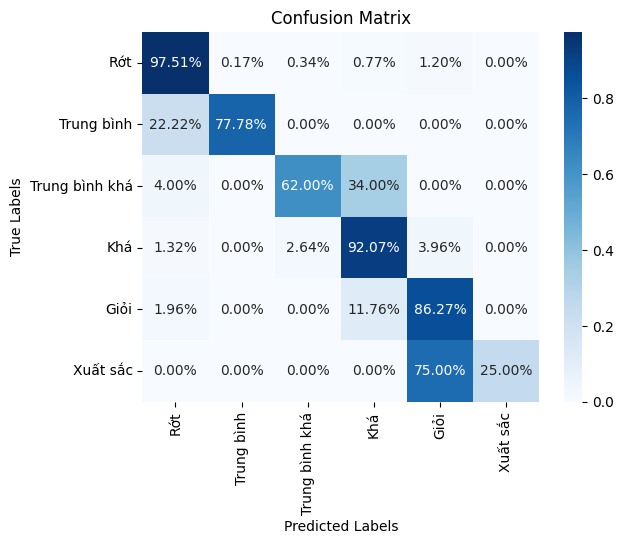

In [167]:
visualization(y_test, y_pred_cb)

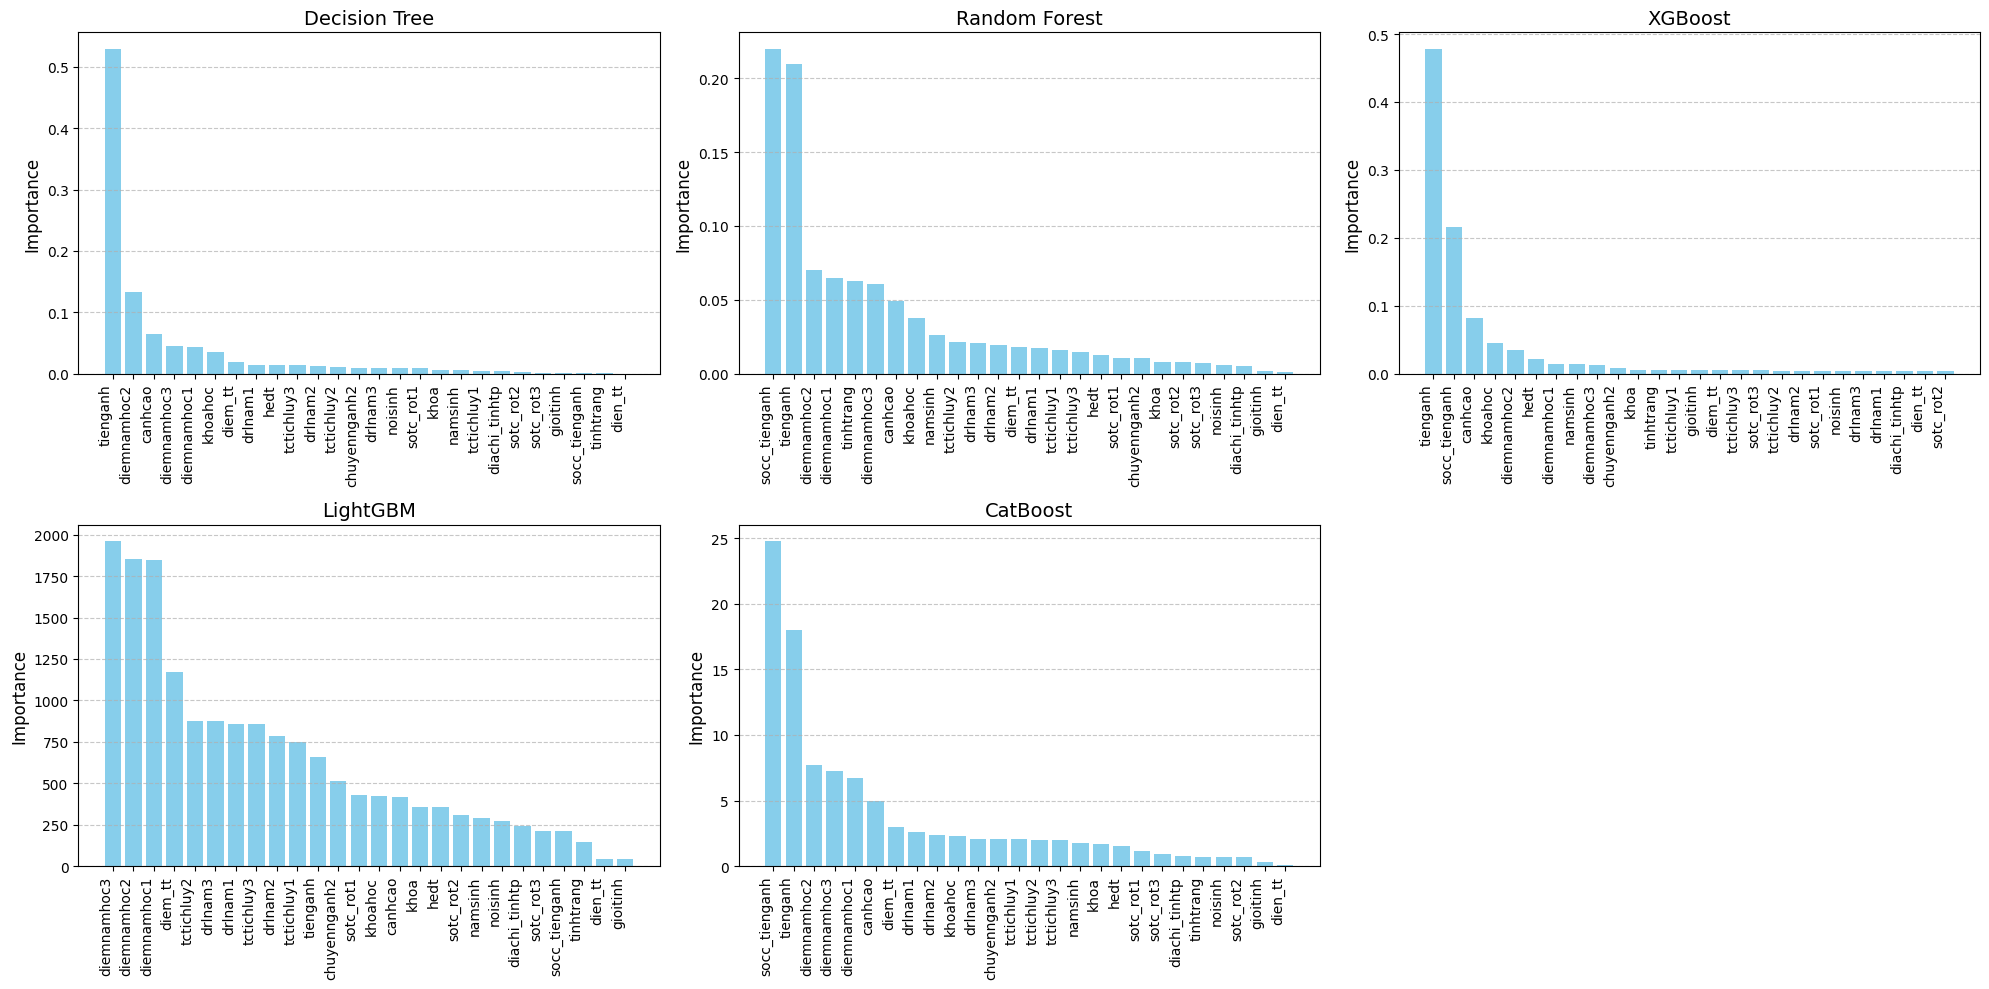

In [168]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# IV. Xây dựng mô hình với cân bằng nhãn

## 1. Sử dụng SMOTE

In [169]:
k_neighbors_config = {
    5: 2,  
    1: 5,  
    2: 7, 
    3: 10, 
    4: 10
}

smote_dict = {}
for label, k_neighbors in k_neighbors_config.items():
    smote_dict[label] = SMOTE(k_neighbors=k_neighbors)

X_train_resampled, y_train_resampled = X_train, y_train
for label, smote in smote_dict.items():
    if label in k_neighbors_config:
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

In [170]:
#smote = SMOTE(k_neighbors=3, random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [171]:
y_train_resampled.value_counts()

0    4746
3    4746
1    4746
2    4746
4    4746
5    4746
Name: xeploai, dtype: int64

### 1.1 Xét 3 năm học

#### a) Decision Tree

In [172]:
model_dt = DecisionTreeClassifier(random_state=42)

In [173]:
model_dt.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_dt = model_dt.predict(X_test)

Weighted f1_score:  0.9186104096038344
Macro f1_score:  0.6684425669095528
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1165
           1       0.88      0.83      0.86        18
           2       0.58      0.66      0.62        50
           3       0.83      0.81      0.82       227
           4       0.73      0.76      0.75       102
           5       0.00      0.00      0.00         4

    accuracy                           0.92      1566
   macro avg       0.66      0.67      0.67      1566
weighted avg       0.92      0.92      0.92      1566



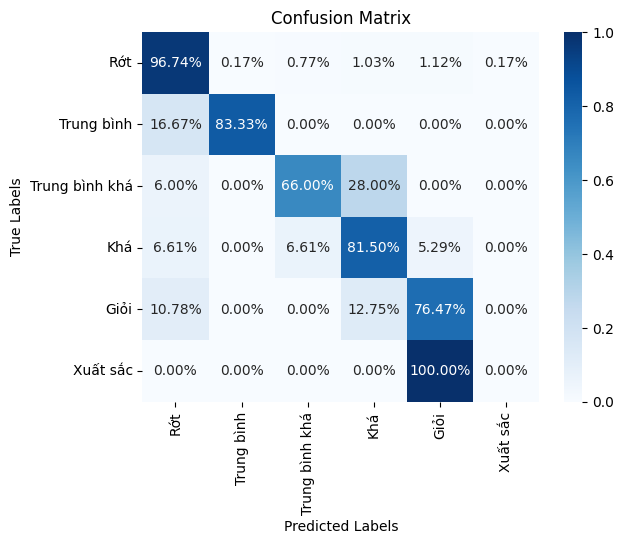

In [174]:
visualization(y_test, y_pred_resampled_dt)

#### b) Random Forest

In [175]:
model_rf = RandomForestClassifier(random_state=42)

In [176]:
model_rf.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9299853346778286
Macro f1_score:  0.6919591118233063
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1165
           1       0.81      0.94      0.87        18
           2       0.67      0.66      0.67        50
           3       0.79      0.89      0.83       227
           4       0.74      0.88      0.80       102
           5       0.00      0.00      0.00         4

    accuracy                           0.93      1566
   macro avg       0.67      0.72      0.69      1566
weighted avg       0.93      0.93      0.93      1566



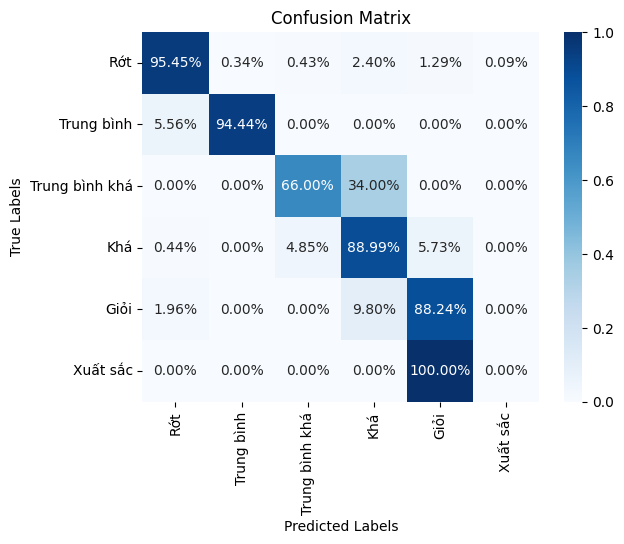

In [177]:
visualization(y_test, y_pred_resampled_rf)

#### c) XGBoost

In [178]:
model_xg = XGBClassifier(random_state=42)

In [179]:
model_xg.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9382613752881405
Macro f1_score:  0.7966319301958765
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.64      0.72      0.68        50
           3       0.84      0.86      0.85       227
           4       0.75      0.87      0.81       102
           5       0.67      0.50      0.57         4

    accuracy                           0.94      1566
   macro avg       0.80      0.80      0.80      1566
weighted avg       0.94      0.94      0.94      1566



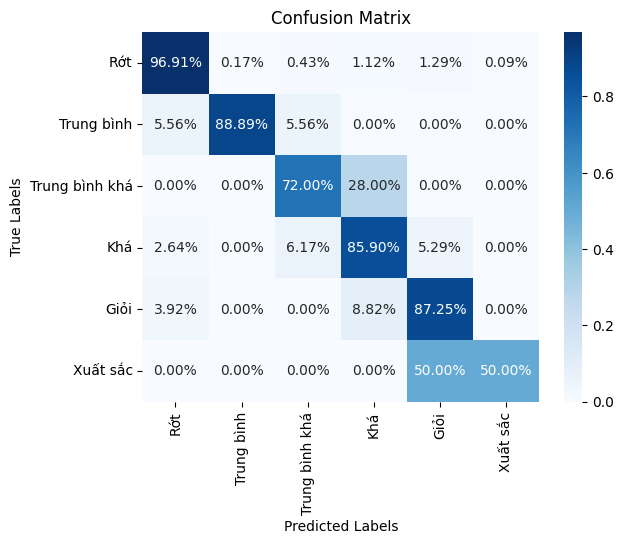

In [180]:
visualization(y_test, y_pred_resampled_xg)

#### d) LightGBM

In [181]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [182]:
model_lgb.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4652
[LightGBM] [Info] Number of data points in the train set: 28476, number of used features: 26
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Weighted f1_score:  0.9366473018812214
Macro f1_score:  0.7681864197426788
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.66      0.74      0.70        50
           3       0.83      0.85      0.84       227
           4       0.74      0.87      0.80       102
           5       1.00      0.25      0.40         4

    accuracy                           0.94      1566
   macro avg       0.85      0.76      0.77      1566
weighted avg       0.94      0.94      0.94      1566



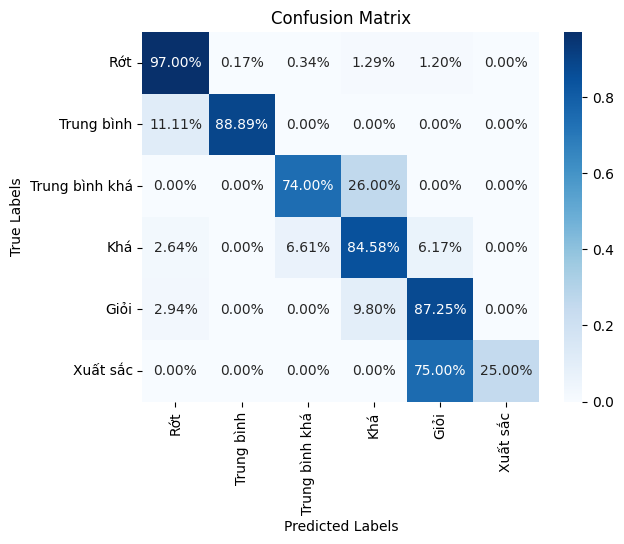

In [183]:
visualization(y_test, y_pred_resampled_lg)

#### e) CatBoost

In [184]:
model_cb = CatBoostClassifier(random_state=42)

In [185]:
model_cb.fit(X_train_resampled, y_train_resampled)
y_pred_resampled_cb = model_cb.predict(X_test)

Learning rate set to 0.093865
0:	learn: 1.4261014	total: 44.3ms	remaining: 44.2s
1:	learn: 1.2032753	total: 73.1ms	remaining: 36.5s
2:	learn: 1.0416767	total: 98.6ms	remaining: 32.8s
3:	learn: 0.9187270	total: 129ms	remaining: 32.1s
4:	learn: 0.8215977	total: 154ms	remaining: 30.7s
5:	learn: 0.7403545	total: 181ms	remaining: 30s
6:	learn: 0.6717223	total: 214ms	remaining: 30.4s
7:	learn: 0.6144146	total: 240ms	remaining: 29.8s
8:	learn: 0.5640394	total: 273ms	remaining: 30s
9:	learn: 0.5205357	total: 298ms	remaining: 29.5s
10:	learn: 0.4830504	total: 322ms	remaining: 28.9s
11:	learn: 0.4502400	total: 352ms	remaining: 29s
12:	learn: 0.4208177	total: 387ms	remaining: 29.4s
13:	learn: 0.3943964	total: 421ms	remaining: 29.7s
14:	learn: 0.3717344	total: 454ms	remaining: 29.8s
15:	learn: 0.3508695	total: 487ms	remaining: 30s
16:	learn: 0.3316188	total: 511ms	remaining: 29.6s
17:	learn: 0.3148925	total: 538ms	remaining: 29.4s
18:	learn: 0.3000577	total: 568ms	remaining: 29.3s
19:	learn: 0.286

Weighted f1_score:  0.9441260008846651
Macro f1_score:  0.7655332681483848
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1165
           1       0.85      0.94      0.89        18
           2       0.68      0.78      0.73        50
           3       0.86      0.89      0.87       227
           4       0.77      0.90      0.83       102
           5       0.33      0.25      0.29         4

    accuracy                           0.94      1566
   macro avg       0.75      0.79      0.77      1566
weighted avg       0.95      0.94      0.94      1566



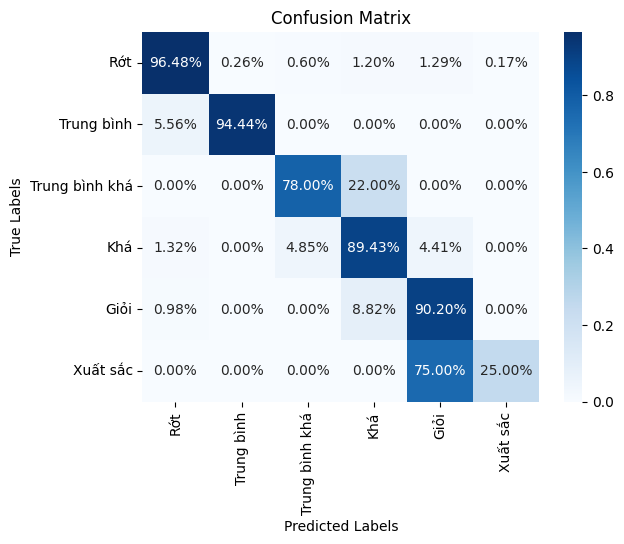

In [186]:
visualization(y_test, y_pred_resampled_cb)

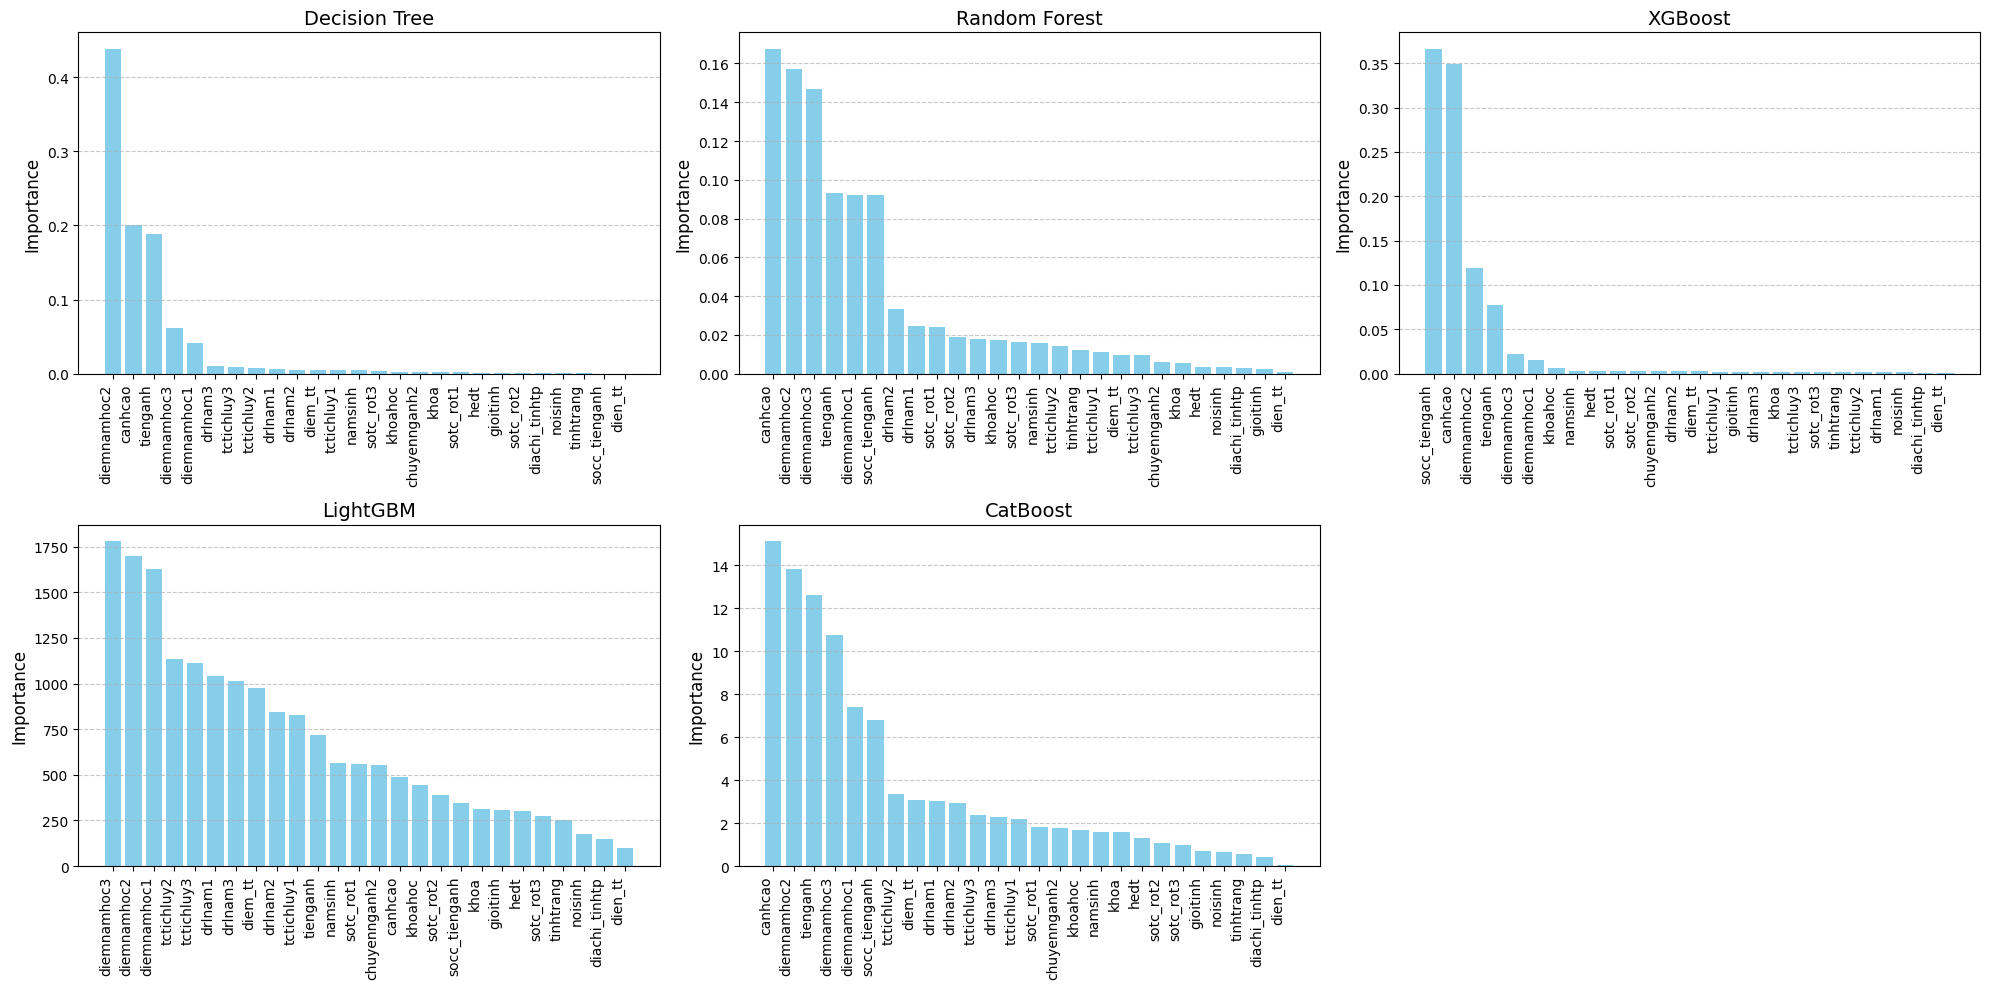

In [187]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train_resampled.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

## 2. Sử dụng đánh trọng số nhãn

In [188]:
y_train.value_counts()

0    4746
3     895
4     358
2     159
1      93
5       9
Name: xeploai, dtype: int64

In [189]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1, 2, 3, 4, 5]),
    y=y_train
)

In [190]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [191]:
class_weight_dict = {i: w for i, w in enumerate(class_weights)}
print("Trọng số nhãn:", class_weight_dict)

Trọng số nhãn: {0: 0.21983424638291896, 1: 11.21863799283154, 2: 6.561844863731656, 3: 1.1657355679702048, 4: 2.914338919925512, 5: 115.92592592592592}


### 2.1 Xét 3 năm học

#### a) Decision Tree

In [192]:
model_dt = DecisionTreeClassifier(class_weight=class_weight_dict, random_state=42)

In [193]:
model_dt.fit(X_train, y_train)
y_pred_ts_dt = model_dt.predict(X_test)

Weighted f1_score:  0.9097265433464619
Macro f1_score:  0.6491594095856715
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1165
           1       0.87      0.72      0.79        18
           2       0.66      0.58      0.62        50
           3       0.79      0.81      0.80       227
           4       0.73      0.73      0.73       102
           5       0.00      0.00      0.00         4

    accuracy                           0.91      1566
   macro avg       0.67      0.63      0.65      1566
weighted avg       0.91      0.91      0.91      1566



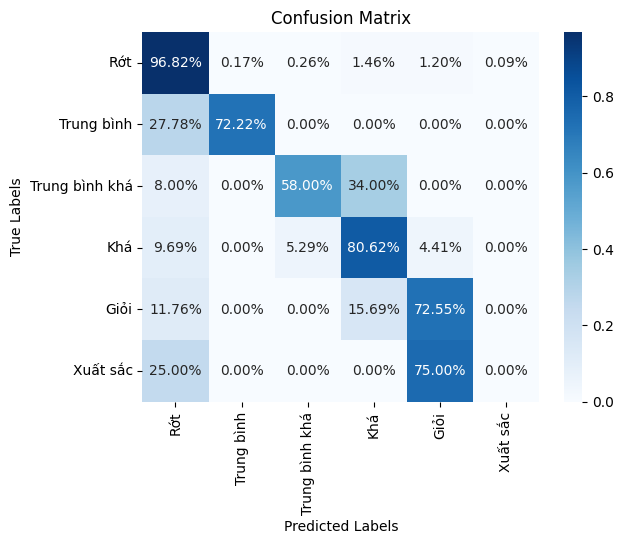

In [194]:
visualization(y_test, y_pred_ts_dt)

#### b) Random Forest

In [195]:
model_rf = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)

In [196]:
model_rf.fit(X_train, y_train)
y_pred_ts_rf = model_rf.predict(X_test)

Weighted f1_score:  0.934577841332437
Macro f1_score:  0.6946440410197418
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.74      0.58      0.65        50
           3       0.80      0.92      0.86       227
           4       0.76      0.82      0.79       102
           5       0.00      0.00      0.00         4

    accuracy                           0.93      1566
   macro avg       0.70      0.70      0.69      1566
weighted avg       0.94      0.93      0.93      1566



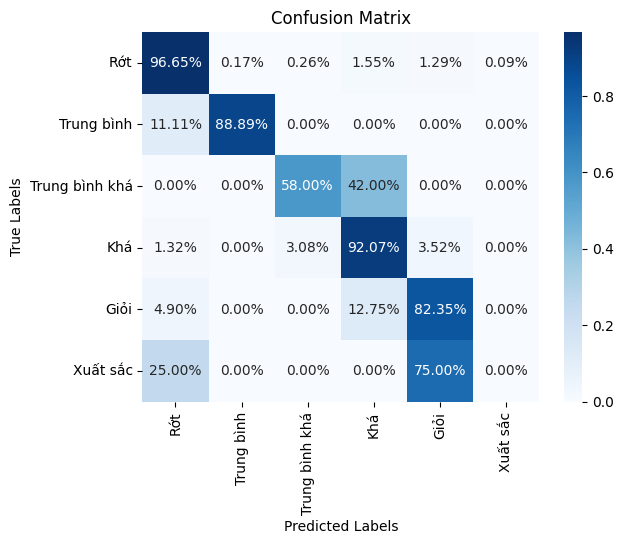

In [197]:
visualization(y_test, y_pred_ts_rf)

#### c) XGBoost

In [198]:
model_xg = XGBClassifier(random_state=42)

In [199]:
model_xg.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_xg = model_xg.predict(X_test)

Weighted f1_score:  0.9413843987292009
Macro f1_score:  0.8108794522985692
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.86      1.00      0.92        18
           2       0.69      0.74      0.71        50
           3       0.84      0.88      0.86       227
           4       0.77      0.88      0.82       102
           5       0.67      0.50      0.57         4

    accuracy                           0.94      1566
   macro avg       0.80      0.83      0.81      1566
weighted avg       0.94      0.94      0.94      1566



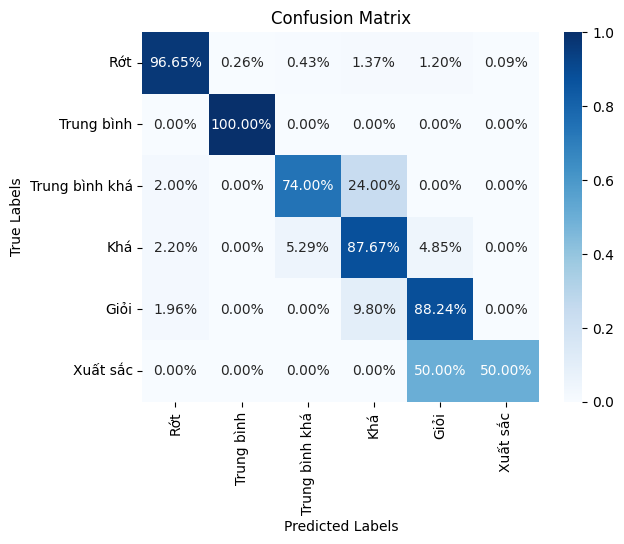

In [200]:
visualization(y_test, y_pred_ts_xg)

#### d) LightGBM

In [201]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [202]:
model_lgb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 26
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791760
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

Weighted f1_score:  0.9382916795005354
Macro f1_score:  0.7766032888074642
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.65      0.70      0.67        50
           3       0.83      0.87      0.85       227
           4       0.79      0.86      0.82       102
           5       0.40      0.50      0.44         4

    accuracy                           0.94      1566
   macro avg       0.76      0.80      0.78      1566
weighted avg       0.94      0.94      0.94      1566



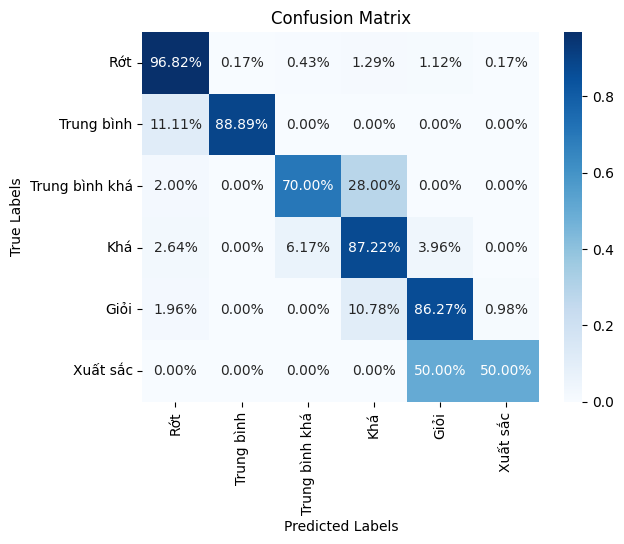

In [203]:
visualization(y_test, y_pred_ts_lg)

#### e) CatBoost

In [204]:
model_cb = CatBoostClassifier(random_state=42)

In [205]:
model_cb.fit(X_train, y_train, sample_weight=sample_weights)
y_pred_ts_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.5467981	total: 82.5ms	remaining: 1m 22s
1:	learn: 1.3434505	total: 94.9ms	remaining: 47.4s
2:	learn: 1.2165049	total: 112ms	remaining: 37.2s
3:	learn: 1.1151389	total: 126ms	remaining: 31.4s
4:	learn: 1.0192013	total: 139ms	remaining: 27.6s
5:	learn: 0.9437003	total: 151ms	remaining: 25s
6:	learn: 0.8807118	total: 161ms	remaining: 22.9s
7:	learn: 0.8224064	total: 191ms	remaining: 23.7s
8:	learn: 0.7720874	total: 203ms	remaining: 22.4s
9:	learn: 0.7241341	total: 212ms	remaining: 21s
10:	learn: 0.6814533	total: 225ms	remaining: 20.2s
11:	learn: 0.6412243	total: 238ms	remaining: 19.6s
12:	learn: 0.6098851	total: 251ms	remaining: 19s
13:	learn: 0.5789108	total: 263ms	remaining: 18.5s
14:	learn: 0.5552599	total: 298ms	remaining: 19.5s
15:	learn: 0.5266910	total: 309ms	remaining: 19s
16:	learn: 0.5054383	total: 320ms	remaining: 18.5s
17:	learn: 0.4836922	total: 334ms	remaining: 18.2s
18:	learn: 0.4669361	total: 347ms	remaining: 17.9s
19:	learn: 0.448

Weighted f1_score:  0.9350682359927961
Macro f1_score:  0.790361444007543
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1165
           1       0.72      1.00      0.84        18
           2       0.62      0.76      0.68        50
           3       0.83      0.88      0.85       227
           4       0.75      0.90      0.82       102
           5       0.67      0.50      0.57         4

    accuracy                           0.93      1566
   macro avg       0.76      0.83      0.79      1566
weighted avg       0.94      0.93      0.94      1566



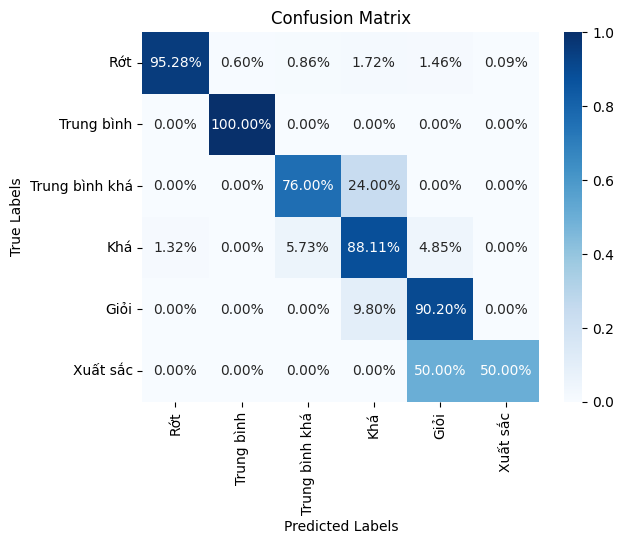

In [206]:
visualization(y_test, y_pred_ts_cb)

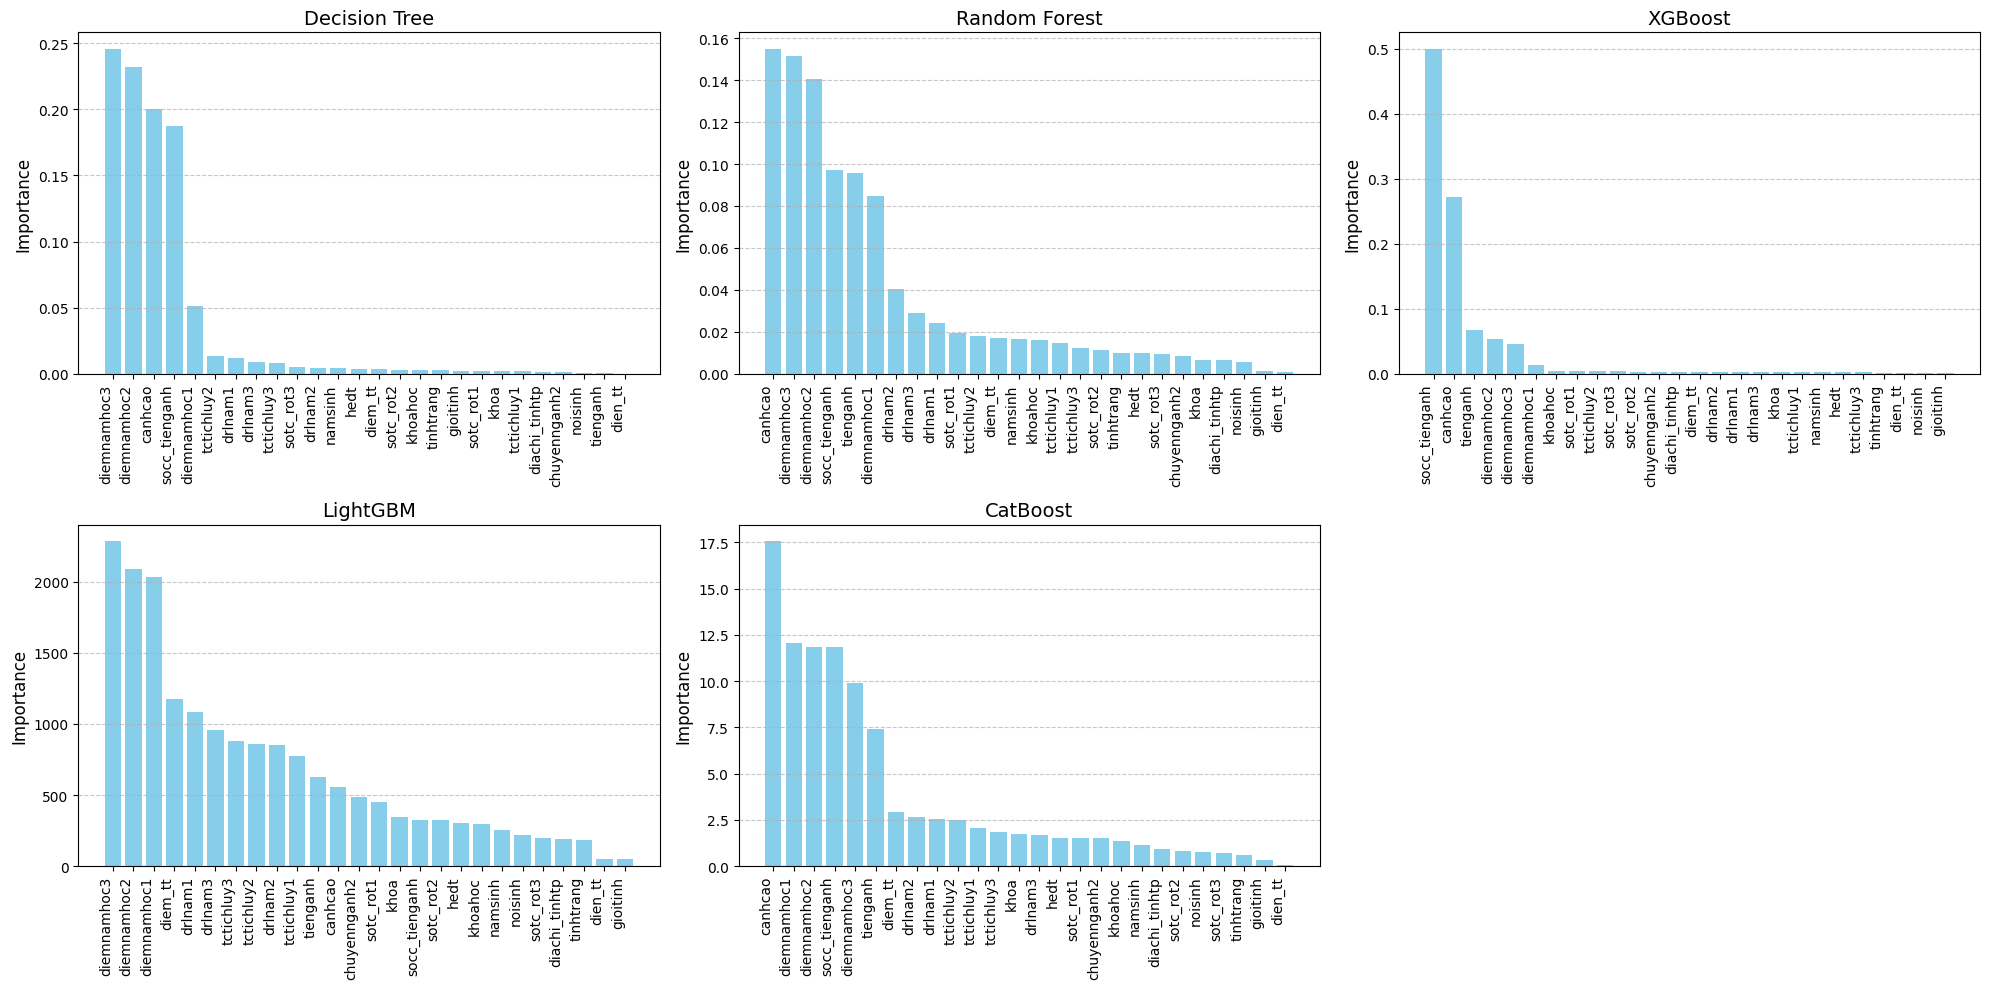

In [207]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# V. Kết quả

## 1. Không xử lý mất cân bằng

In [208]:
df_res = make_results_df(y_test, [y_pred_dt, y_pred_rf, y_pred_xg, y_pred_lg, y_pred_cb])

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
df_res

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.920817,0.730271,0.735669,0.731820
Random Forest,0.934227,0.681752,0.688237,0.683018
XGBoost,0.938697,0.789238,0.731354,0.750597
LightGBM,0.934866,0.697527,0.710640,0.702751
CatBoost,0.944444,0.873265,0.734389,0.764036


## 2. SMOTE

In [210]:
df_res_sm = make_results_df(y_test, [y_pred_resampled_dt, y_pred_resampled_rf, y_pred_resampled_xg, y_pred_resampled_lg, y_pred_resampled_cb])

In [211]:
df_res_sm

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.918263,0.664759,0.673400,0.668443
Random Forest,0.928480,0.667184,0.721862,0.691959
XGBoost,0.936782,0.797859,0.801595,0.796632
LightGBM,0.935504,0.852735,0.761202,0.768186
CatBoost,0.942529,0.747720,0.789248,0.765533


## 3. Đánh trọng số nhãn

In [212]:
df_res_ts = make_results_df(y_test, [y_pred_ts_dt, y_pred_ts_rf, y_pred_ts_xg, y_pred_ts_lg, y_pred_ts_cb])

In [213]:
df_res_ts

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.911239,0.667716,0.633687,0.649159
Random Forest,0.934866,0.697868,0.696608,0.694644
XGBoost,0.939974,0.801806,0.827588,0.810879
LightGBM,0.936782,0.757504,0.798687,0.776603
CatBoost,0.932312,0.764578,0.832635,0.790361
